# World Weather Analysis

### Import Dependencies

In [7]:
# Import the dependencies.
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

### Import the Requests Library,  the weather_api_key, and build URL for OpenWeatherMap.

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

###  Initialize an Empty List and Counters

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) #output is a zip object in memory. # packs into a tuple.
lat_lngs

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 23 | gorontalo
Processing Record 2 of Set 23 | busselton
Processing Record 3 of Set 23 | ushuaia
Processing Record 4 of Set 23 | jamestown
Processing Record 5 of Set 23 | hilo
Processing Record 6 of Set 23 | hennenman
Processing Record 7 of Set 23 | severnyy
Processing Record 8 of Set 23 | katsuura
Processing Record 9 of Set 23 | ketchikan
Processing Record 10 of Set 23 | faanui
Processing Record 11 of Set 23 | namatanai
Processing Record 12 of Set 23 | kaitangata
Processing Record 13 of Set 23 | matagami
Processing Record 14 of Set 23 | kapaa
Processing Record 15 of Set 23 | kirakira
Processing Record 16 of Set 23 | sao filipe
Processing Record 17 of Set 23 | nikolskoye
Processing Record 18 of Set 23 | albany
Processing Record 19 of Set 23 | adrar
Processing Record 20 of Set 23 | bluff
Processing Record 21 of Set 23 | torbay
Processing Record 22 of Set 23 | opobo
City not found. Skipping...
Processing Record 23 of Set 23 | ponta do sol
Processing Record 24 o

Processing Record 37 of Set 26 | norsup
Processing Record 38 of Set 26 | luba
Processing Record 39 of Set 26 | shablykino
Processing Record 40 of Set 26 | todos santos
Processing Record 41 of Set 26 | arenapolis
Processing Record 42 of Set 26 | laguna
Processing Record 43 of Set 26 | coari
Processing Record 44 of Set 26 | ngunguru
Processing Record 45 of Set 26 | kashary
Processing Record 46 of Set 26 | paratinga
Processing Record 47 of Set 26 | mizpe ramon
City not found. Skipping...
Processing Record 48 of Set 26 | westport
Processing Record 49 of Set 26 | bethel
Processing Record 50 of Set 26 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 27 | severo-kurilsk
Processing Record 2 of Set 27 | olga
Processing Record 3 of Set 27 | matara
Processing Record 4 of Set 27 | rafaela
Processing Record 5 of Set 27 | kungurtug
Processing Record 6 of Set 27 | tommot
Processing Record 7 of Set 27 | klaksvik
Processing Record 8 of Set 27 | meulaboh
Processing Record 9 of Set 27

Processing Record 23 of Set 30 | gunnedah
Processing Record 24 of Set 30 | mahebourg
Processing Record 25 of Set 30 | hailar
Processing Record 26 of Set 30 | sentyabrskiy
City not found. Skipping...
Processing Record 27 of Set 30 | talnakh
Processing Record 28 of Set 30 | morant bay
Processing Record 29 of Set 30 | oranjemund
Processing Record 30 of Set 30 | novospasskoye
Processing Record 31 of Set 30 | aljezur
Processing Record 32 of Set 30 | gloucester
Processing Record 33 of Set 30 | vardo
Processing Record 34 of Set 30 | xingyi
Processing Record 35 of Set 30 | ayer tawar
Processing Record 36 of Set 30 | fortuna
Processing Record 37 of Set 30 | ingham
Processing Record 38 of Set 30 | bilopillya
Processing Record 39 of Set 30 | limon
Processing Record 40 of Set 30 | champerico
Processing Record 41 of Set 30 | ankpa
Processing Record 42 of Set 30 | wahiawa
Processing Record 43 of Set 30 | butaritari
Processing Record 44 of Set 30 | mhango
Processing Record 45 of Set 30 | toora-khem
P

Processing Record 9 of Set 34 | sapouy
Processing Record 10 of Set 34 | kadaya
Processing Record 11 of Set 34 | laje
Processing Record 12 of Set 34 | sistranda
Processing Record 13 of Set 34 | pamanukan
Processing Record 14 of Set 34 | galle
Processing Record 15 of Set 34 | baruun-urt
Processing Record 16 of Set 34 | inhambane
Processing Record 17 of Set 34 | okha
Processing Record 18 of Set 34 | high level
Processing Record 19 of Set 34 | shenkursk
Processing Record 20 of Set 34 | panjab
Processing Record 21 of Set 34 | camacha
Processing Record 22 of Set 34 | buraydah
Processing Record 23 of Set 34 | roald
Processing Record 24 of Set 34 | neuquen
Processing Record 25 of Set 34 | rozivka
Processing Record 26 of Set 34 | svetlyy
Processing Record 27 of Set 34 | tosya
Processing Record 28 of Set 34 | los llanos de aridane
Processing Record 29 of Set 34 | dauphin
Processing Record 30 of Set 34 | pevek
Processing Record 31 of Set 34 | gravdal
Processing Record 32 of Set 34 | carballo
Proc

In [15]:
# Print the city count to confirm sufficient count.
len(city_data)

573

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gorontalo,0.5412,123.0595,77.11,89,100,1.36,ID,2022-11-21 17:09:04
1,Busselton,-33.6500,115.3333,58.73,63,0,14.83,AU,2022-11-21 17:09:05
2,Ushuaia,-54.8000,-68.3000,56.82,54,75,16.11,AR,2022-11-21 17:09:03
3,Jamestown,42.0970,-79.2353,36.99,45,0,14.97,US,2022-11-21 17:06:02
4,Hilo,19.7297,-155.0900,69.24,96,75,6.91,US,2022-11-21 17:04:59
5,Hennenman,-27.9765,27.0242,72.91,13,99,4.81,ZA,2022-11-21 17:09:06
6,Severnyy,50.6770,36.5532,32.04,100,100,11.18,RU,2022-11-21 17:09:06
7,Katsuura,35.1333,140.3000,60.66,88,83,10.63,JP,2022-11-21 17:09:07
8,Ketchikan,55.3422,-131.6461,43.57,95,100,14.14,US,2022-11-21 17:09:07
9,Faanui,-16.4833,-151.7500,78.71,76,22,14.94,PF,2022-11-21 17:09:08


In [18]:
new_column_order = ["City", "Country", "Date", 'Lat', "Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gorontalo,ID,2022-11-21 17:09:04,0.5412,123.0595,77.11,89,100,1.36
1,Busselton,AU,2022-11-21 17:09:05,-33.6500,115.3333,58.73,63,0,14.83
2,Ushuaia,AR,2022-11-21 17:09:03,-54.8000,-68.3000,56.82,54,75,16.11
3,Jamestown,US,2022-11-21 17:06:02,42.0970,-79.2353,36.99,45,0,14.97
4,Hilo,US,2022-11-21 17:04:59,19.7297,-155.0900,69.24,96,75,6.91
5,Hennenman,ZA,2022-11-21 17:09:06,-27.9765,27.0242,72.91,13,99,4.81
6,Severnyy,RU,2022-11-21 17:09:06,50.6770,36.5532,32.04,100,100,11.18
7,Katsuura,JP,2022-11-21 17:09:07,35.1333,140.3000,60.66,88,83,10.63
8,Ketchikan,US,2022-11-21 17:09:07,55.3422,-131.6461,43.57,95,100,14.14
9,Faanui,PF,2022-11-21 17:09:08,-16.4833,-151.7500,78.71,76,22,14.94


In [20]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

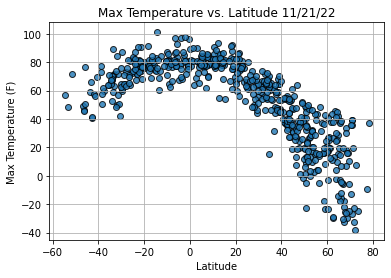

In [24]:
# Build the scatter plot for max temp vs. latitude.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Max Temperature vs. Latitude "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

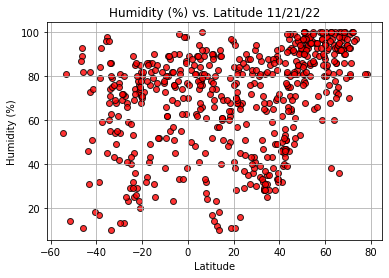

In [28]:
# Build the scatter plot for humidity vs.latitude.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", color = "red")

# Incorporate the other graph properties.
plt.title(f"Humidity (%) vs. Latitude "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig2.png")

# Show plot.
plt.show()

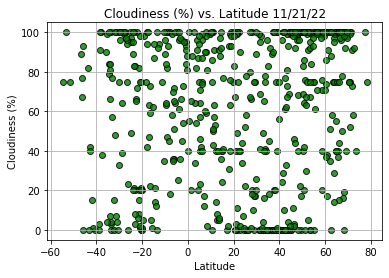

In [27]:
# Build the scatter plot for cloudiness vs. latitude.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", color = "green")

# Incorporate the other graph properties.
plt.title(f"Cloudiness (%) vs. Latitude "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for wind speed vs. latitude.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", color = "orange")

# Incorporate the other graph properties.
plt.title(f"Wind Speed (mph) vs. Latitude "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig4.png")

# Show plot.
plt.show()